## Zomato Restaurant Project 

Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables: Country code and Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies 
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

Dataset Link

https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

## Zomato Restaurant Project - predict the 'Average Cost for two' - Regression Problem

In [358]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score

## Data Collection

In [359]:
zomato_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv", encoding = 'latin-1')
zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [360]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Observation:
            1. Predict predict the Average Cost for two is a continous data so this is a 
               Regression problem. 
            2. The target is 'Average Cost for two' 

In [361]:
zomato_df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [362]:
zomato_country_df = pd.read_excel("Country-Code.xlsx")
zomato_country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Observation:
            1. Excel file which has 'Country' and 'Country Code'

## Merge both tha data frames - 'zomato_df' and 'zomato_country_df'

In [363]:
final_zomato_df1 = pd.merge(zomato_df, zomato_country_df, on = 'Country Code', how ='left')

In [364]:
final_zomato_df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [365]:
final_zomato_df1.shape

(9551, 22)

Observation:
            1. Merge both tha data frames - 'zomato_df' and 'zomato_country_df'

## Exploratory Data Analysis

In [366]:
final_zomato_df1.shape

(9551, 22)

In [367]:
final_zomato_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [368]:
final_zomato_df1.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Drop Columns not needed

In [369]:
final_zomato_df1.shape

(9551, 22)

In [370]:
final_zomato_df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [371]:
# 'Restaurant ID' column not needed for prediction of 'Average Cost for two'

final_zomato_df1.drop(['Restaurant ID', 'Restaurant Name'], axis = 1, inplace = True)

In [372]:
final_zomato_df1.shape

(9551, 20)

## Handle Null values

In [373]:
final_zomato_df1.dtypes

Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [374]:
final_zomato_df1.isna().sum()

Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Observation:
            1. There are NULL values in 'Cuisines' column

In [375]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [376]:
# Handle all features Null values - Object type

for i in final_zomato_df1.columns:
    if final_zomato_df1.dtypes[i] == 'object':
        final_zomato_df1[i] = final_zomato_df1[i].fillna(final_zomato_df1[i].mode()[0])

In [377]:
final_zomato_df1.isna().sum()

Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Observation:
            1. Now no NULL values

## check for any blank records

In [378]:
for i in final_zomato_df1.columns:
    print(final_zomato_df1.loc[final_zomato_df1[i] == ' '])

Empty DataFrame
Columns: [Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []
Empty DataFrame
Columns: [Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []
Empty DataFrame
Columns: [Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []
Empty DataFrame
Columns: [Country Code, City, Address, Locality, Lo

Observation:
            1. checked all 20 columns but none have any blank values

## check the duplicate values in rows

In [379]:
final_zomato_df1.shape

(9551, 20)

In [380]:
final_zomato_df1.duplicated().sum()

0

In [381]:
final_zomato_df1.shape

(9551, 20)

Observation:
            1. No duplicate values in any of the rows.

## Number of uniques values in each column 

In [382]:
final_zomato_df1.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825
Average Cost for two,140
Currency,12


In [383]:
# check the value counts of each column

for i in final_zomato_df1.columns:
    print(final_zomato_df1[i].value_counts())
    print('\n')

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Cyber Hub, DLF Cyber City, Gurgaon                                                        8
          

In [384]:
final_zomato_df1['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

## Drop columns not needed

In [385]:
final_zomato_df1.shape

(9551, 20)

In [386]:
# 'Switch to order menu' column not needed as it has only one value

final_zomato_df1.drop(['Switch to order menu'], axis = 1, inplace = True)

In [387]:
final_zomato_df1.shape

(9551, 19)

In [388]:
final_zomato_df1.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. Looks like there are quite more number of outliers

In [389]:
final_zomato_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Address               9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9551 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

In [390]:
final_zomato_df1.head()

,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [391]:
final_zomato_df1.shape

(9551, 19)

## Drop columns not needed

In [392]:
final_zomato_df1.shape

(9551, 19)

In [393]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [394]:
# 'Locality Verbose' column not needed as it has repetitions value even in 'Locality'

final_zomato_df1.drop(['Locality Verbose'], axis = 1, inplace = True)

In [395]:
final_zomato_df1.shape

(9551, 18)

In [396]:
final_zomato_df1.head()

,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Identify 'Price range' field has any non-numeric data

In [397]:
final_zomato_df1['Price range'].dtypes

dtype('int64')

In [398]:
final_zomato_df1['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [399]:
final_zomato_df1['Price range'] = pd.to_numeric(final_zomato_df1['Price range'], errors='coerce')

In [400]:
final_zomato_df1['Price range'].dtypes

dtype('int64')

In [401]:
final_zomato_df1['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [402]:
final_zomato_df1['Price range']

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64

In [403]:
final_zomato_df1.dtypes

Country Code              int64
City                     object
Address                  object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Identify 'Country Code' field has any non-numeric data

In [404]:
final_zomato_df1['Country Code'].dtypes

dtype('int64')

In [405]:
final_zomato_df1['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [406]:
final_zomato_df1['Country Code'] = pd.to_numeric(final_zomato_df1['Country Code'], errors='coerce')

In [407]:
final_zomato_df1['Country Code'] 

0       162
1       162
2       162
3       162
4       162
       ... 
9546    208
9547    208
9548    208
9549    208
9550    208
Name: Country Code, Length: 9551, dtype: int64

In [408]:
final_zomato_df1['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [409]:
final_zomato_df1['Country Code'] 

0       162
1       162
2       162
3       162
4       162
       ... 
9546    208
9547    208
9548    208
9549    208
9550    208
Name: Country Code, Length: 9551, dtype: int64

In [410]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

## Data Visualization

In [411]:
final_zomato_df1.shape

(9551, 18)

In [412]:
final_zomato_df1.dtypes

Country Code              int64
City                     object
Address                  object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [413]:
# seperating numerical and categorical columns

cat_col = []
for i in final_zomato_df1.dtypes.index:
    if final_zomato_df1.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in final_zomato_df1.dtypes.index:
    if final_zomato_df1.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['City', 'Address', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']


Numerical Column ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


Observation:
            1. There are 07 numerical data and 11 categorical data

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


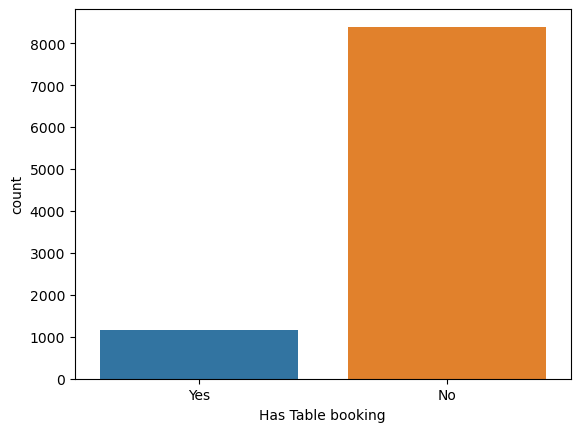

In [59]:
# Univariate Analysis

sns.countplot(x = 'Has Table booking', data = final_zomato_df1)
print(final_zomato_df1['Has Table booking'].value_counts())

Observation:
            1. Many restaurants dont accept 'Table bookings'

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


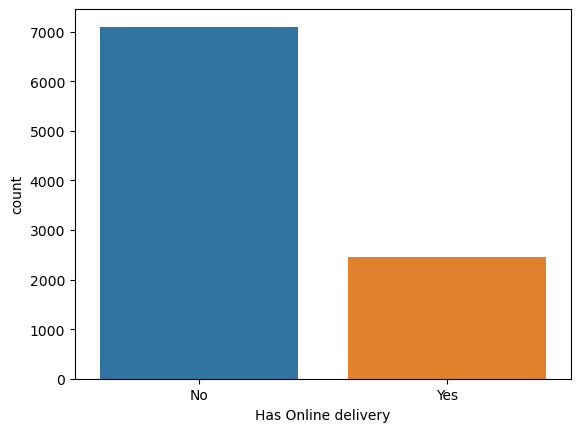

In [60]:
# Univariate Analysis

sns.countplot(x = 'Has Online delivery', data = final_zomato_df1)
print(final_zomato_df1['Has Online delivery'].value_counts())

Observation:
            1. Many restaurants dont accept 'Online delivery'

No     9517
Yes      34
Name: Is delivering now, dtype: int64


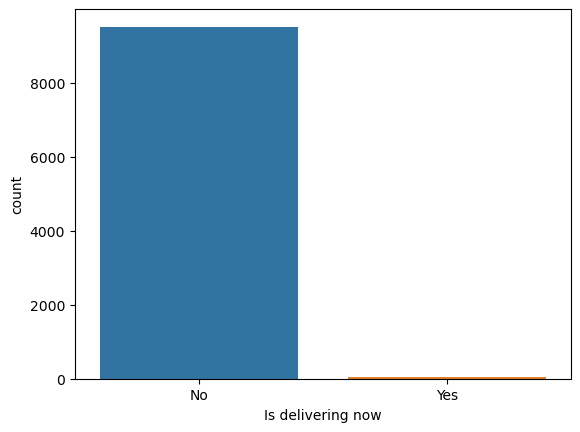

In [61]:
# Univariate Analysis

sns.countplot(x = 'Is delivering now', data = final_zomato_df1)
print(final_zomato_df1['Is delivering now'].value_counts())

Observation:
            1. Many restaurants dont accept 'delivering now'

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


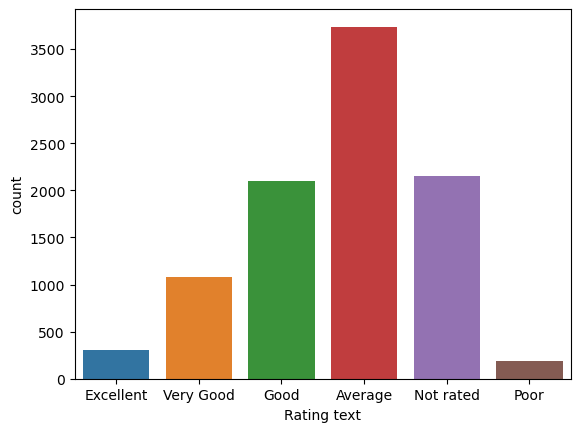

In [62]:
# Univariate Analysis

sns.countplot(x = 'Rating text', data = final_zomato_df1)
print(final_zomato_df1['Rating text'].value_counts())

Observation:
            1. There are more number of Average ratings

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


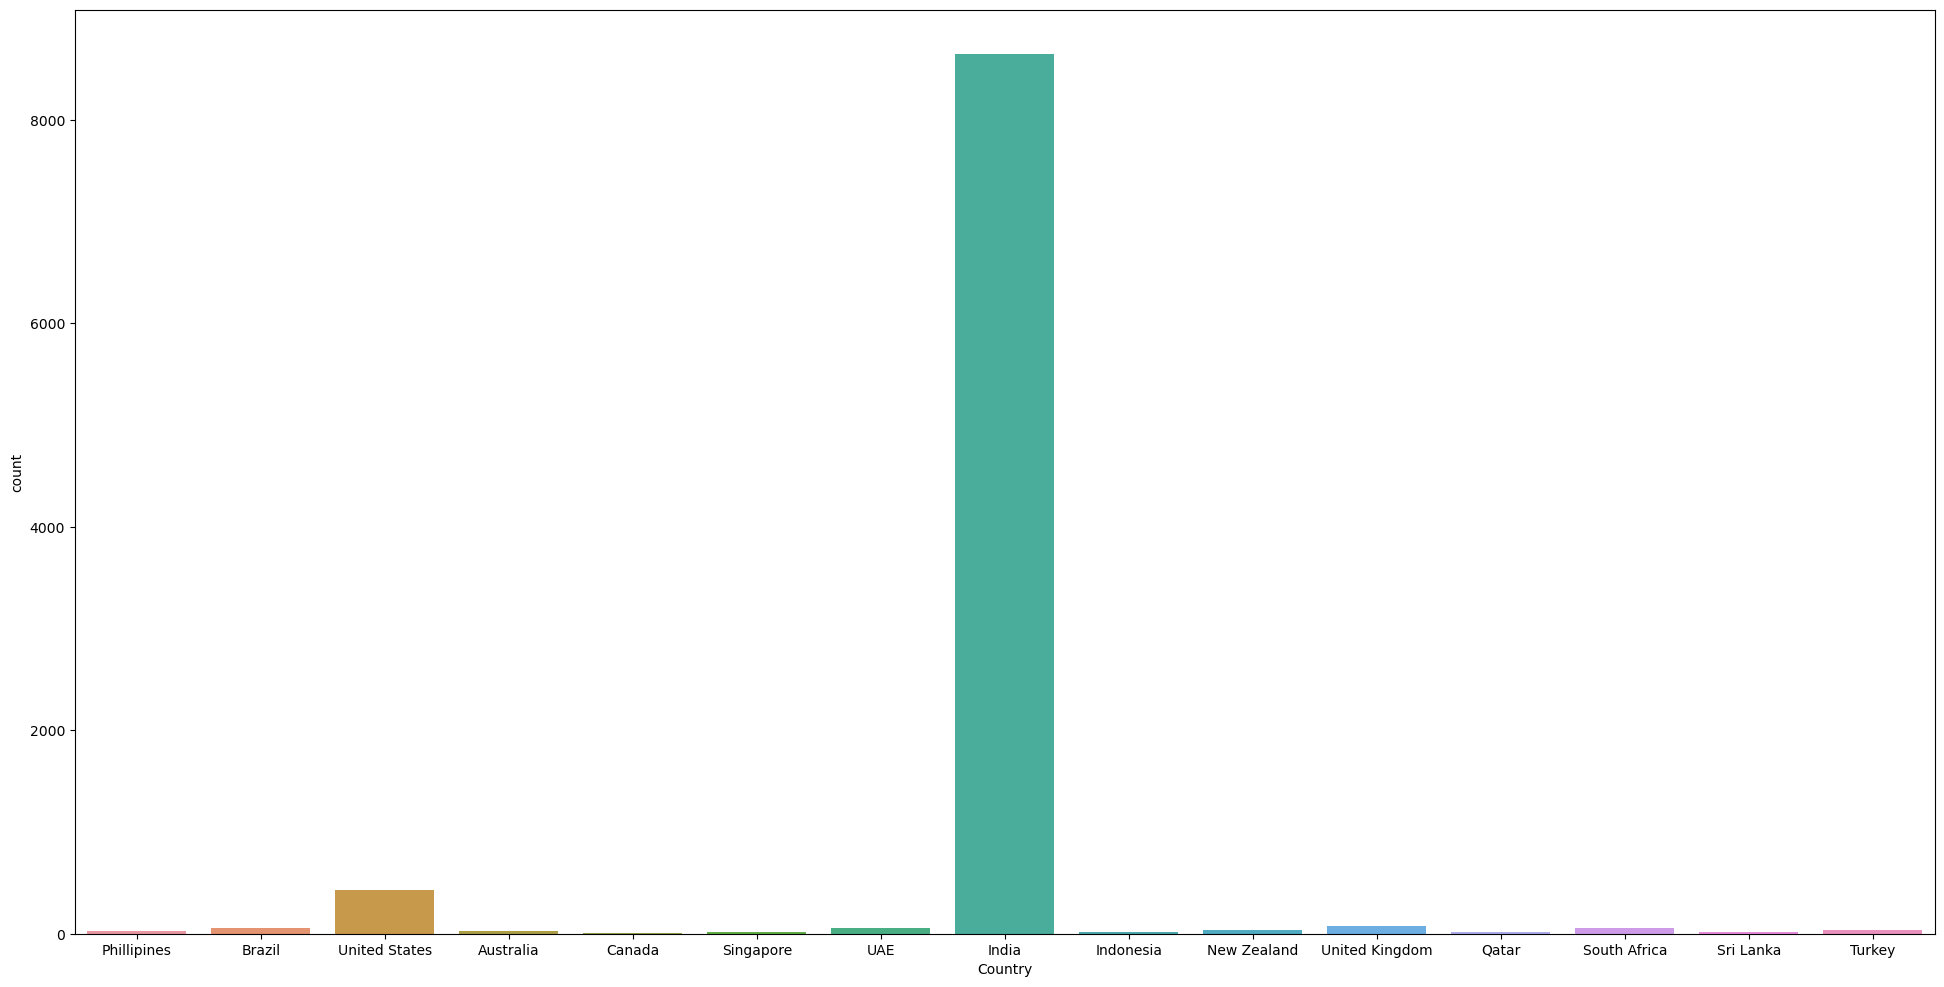

In [63]:
# Univariate Analysis

plt.rcParams['figure.figsize'] = (24, 12)
sns.countplot(x = 'Country', data = final_zomato_df1)
print(final_zomato_df1['Country'].value_counts())

Observation:
            1. Maximum number of transaction are from India

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


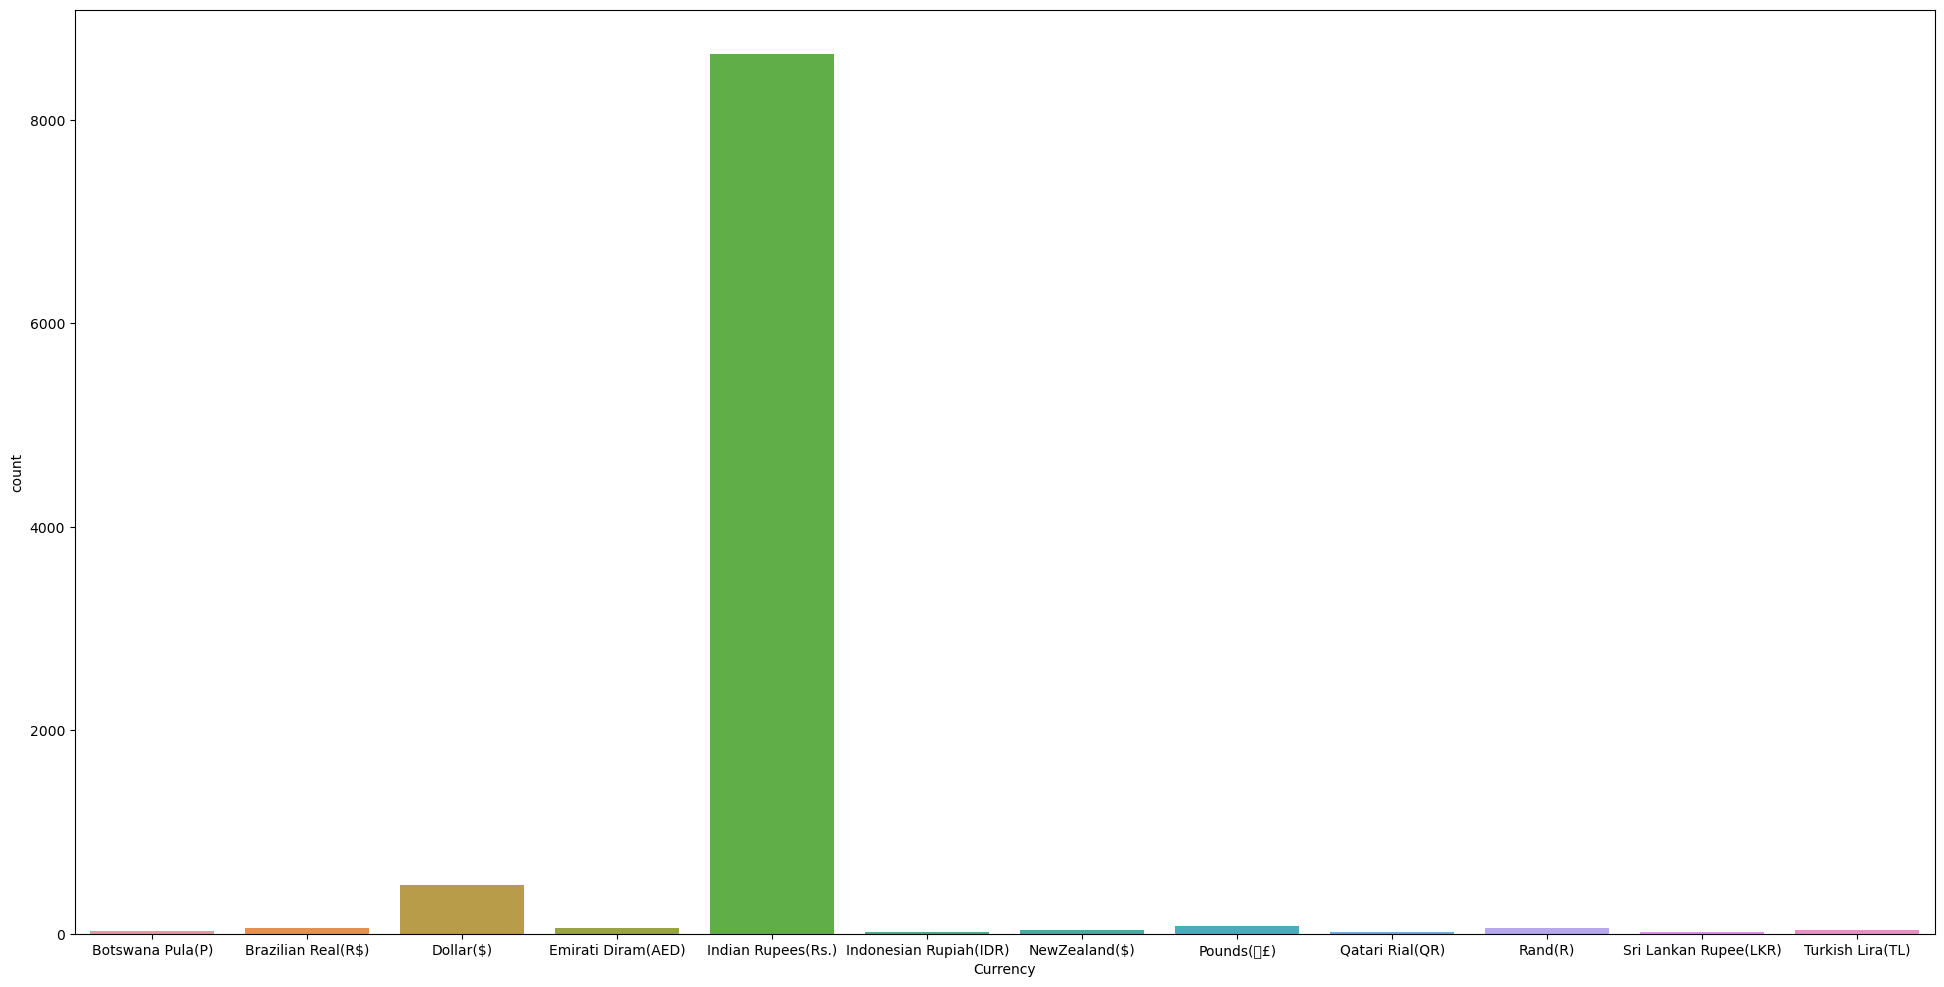

In [64]:
# Univariate Analysis

plt.rcParams['figure.figsize'] = (24, 12)
sns.countplot(x = 'Currency', data = final_zomato_df1)
print(final_zomato_df1['Currency'].value_counts())

Observation:
            1. Maximum number of transaction are from India - hence more number of currency is Rs  

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


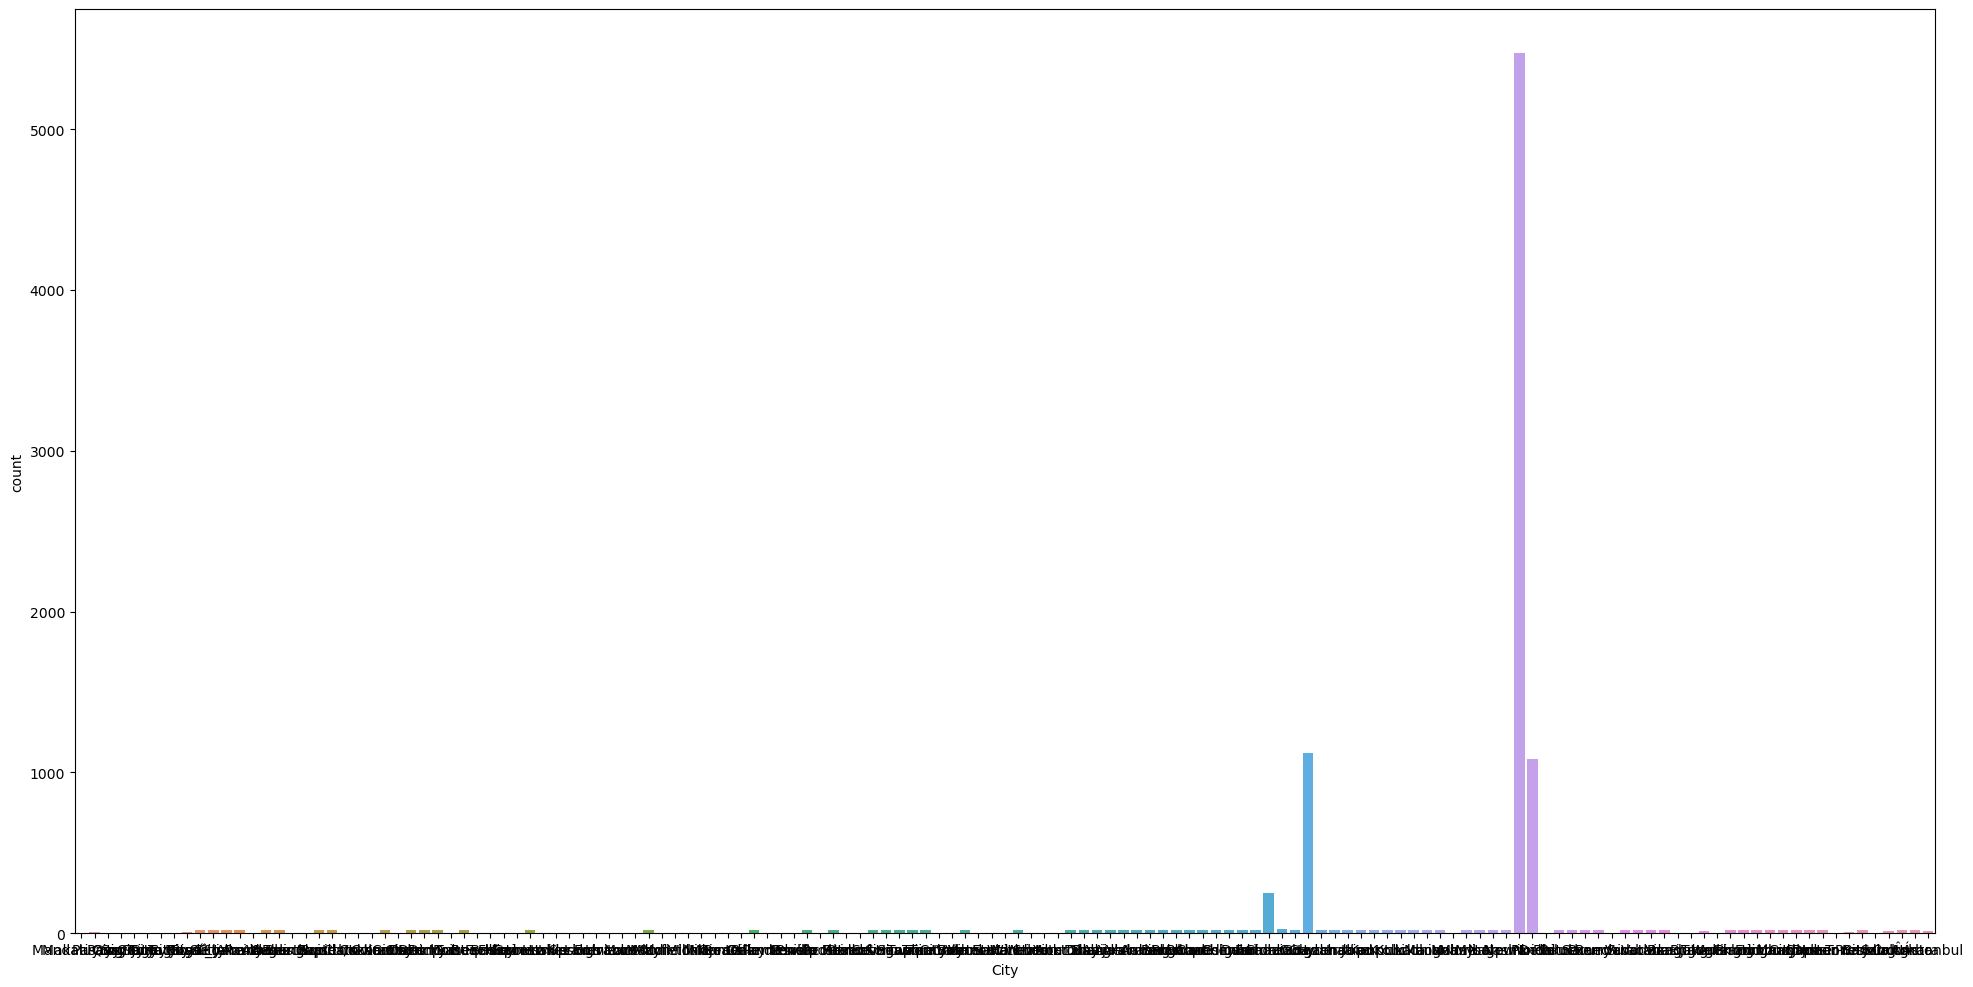

In [65]:
# Univariate Analysis

plt.rcParams['figure.figsize'] = (24, 12)
sns.countplot(x = 'City', data = final_zomato_df1)
print(final_zomato_df1['City'].value_counts())

Observation:
            1. Maximum number of transaction are from India - especiaaly from City "New Delhi"

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


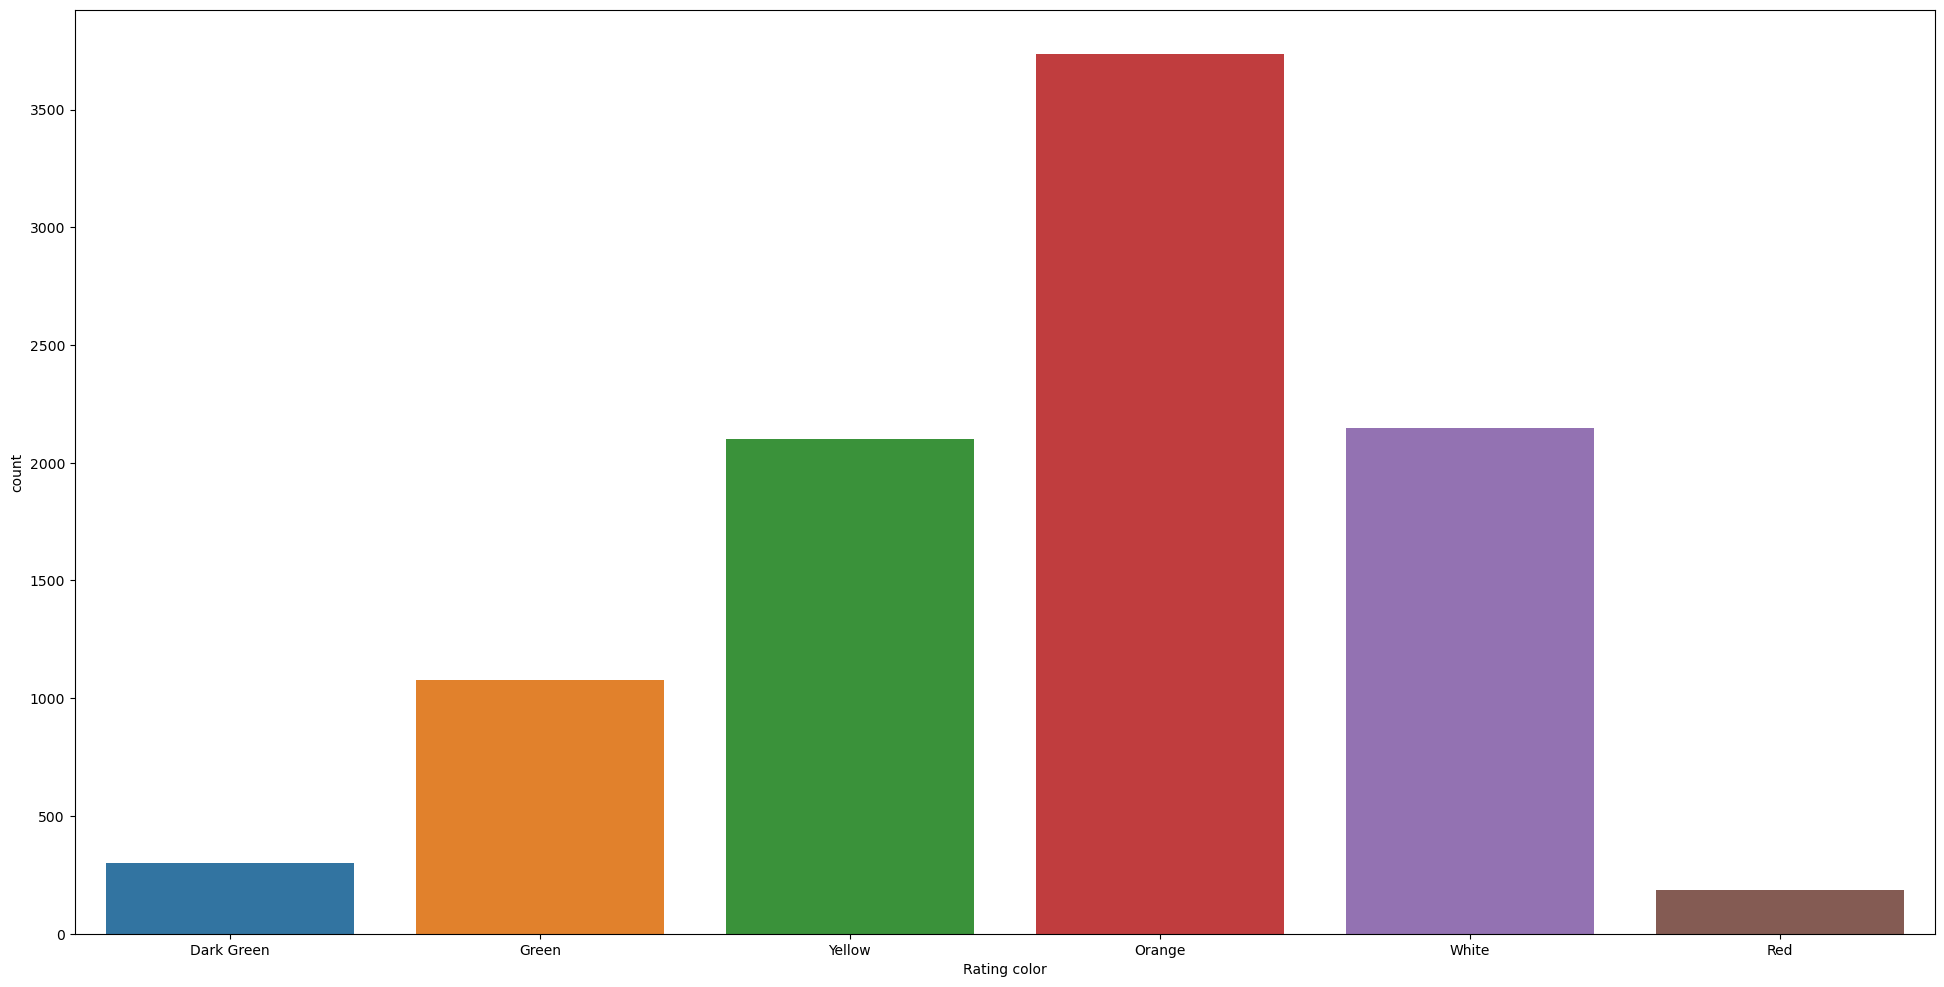

In [66]:
# Univariate Analysis

sns.countplot(x = 'Rating color', data = final_zomato_df1)
print(final_zomato_df1['Rating color'].value_counts())

Observation:
            1. Orange rating color are more

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


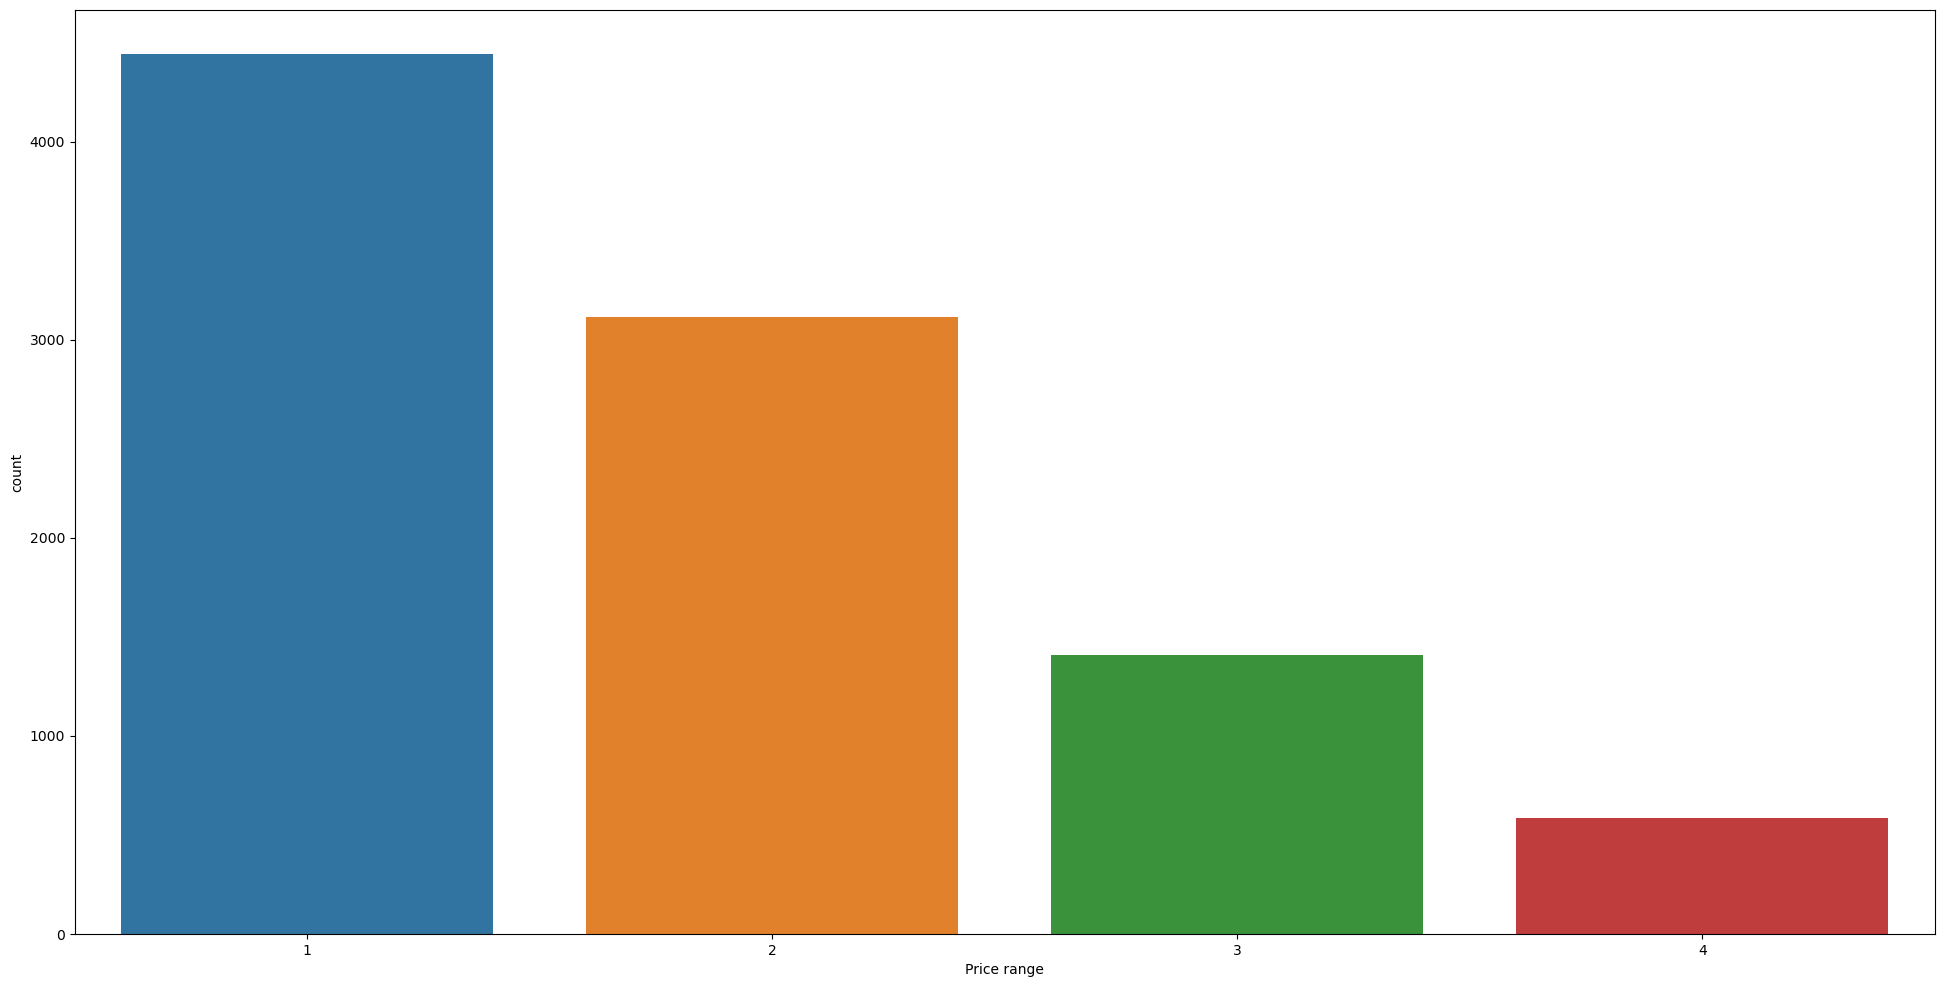

In [67]:
# Univariate Analysis

plt.rcParams['figure.figsize'] = (24, 12)
sns.countplot(x = 'Price range', data = final_zomato_df1)
print(final_zomato_df1['Price range'].value_counts())

In [68]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [69]:
num_col

['Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

<AxesSubplot:xlabel='Aggregate rating', ylabel='Votes'>

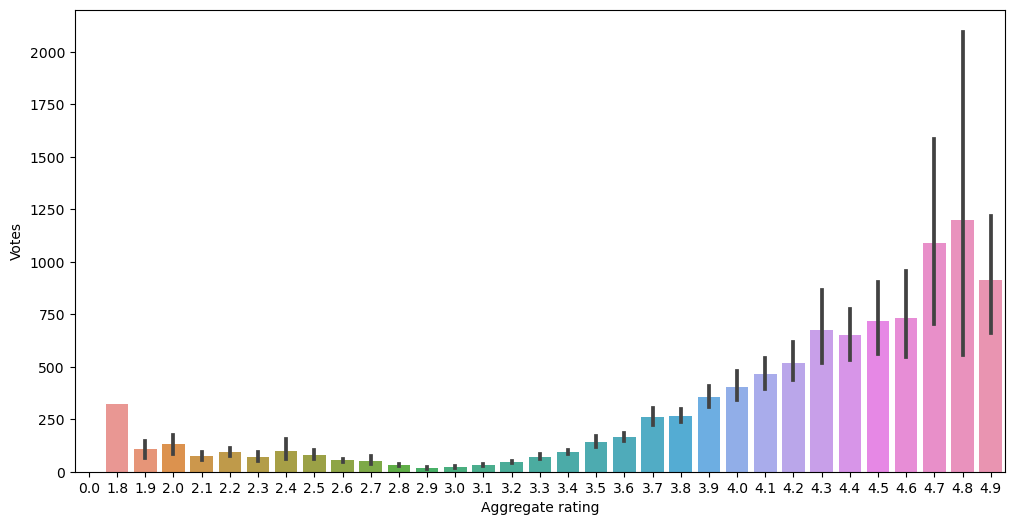

In [70]:
# Bivaraite Analysis

plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = "Aggregate rating", y = "Votes", data = final_zomato_df1)

Observation:
            1. Avearge rating 4.8 has more votes

<AxesSubplot:xlabel='Country Code', ylabel='Average Cost for two'>

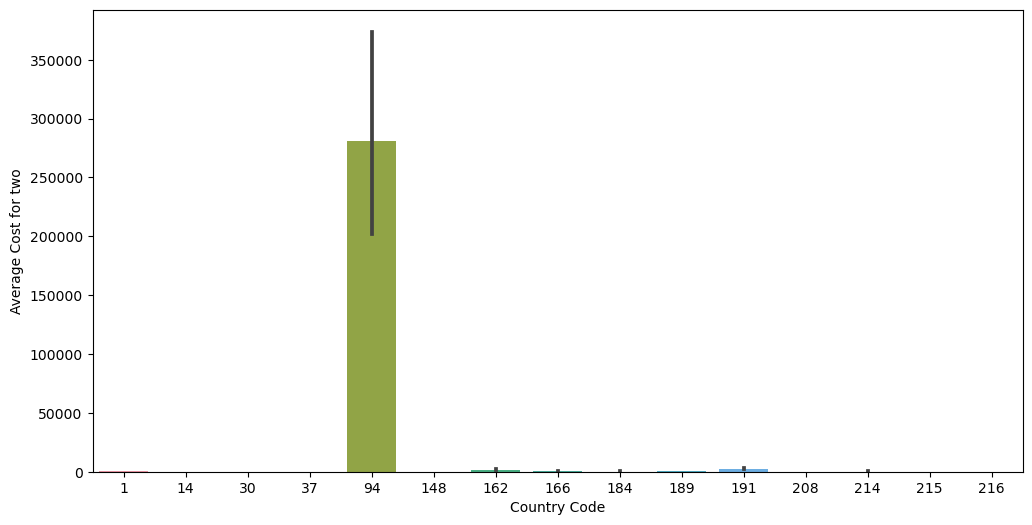

In [71]:
# Bivaraite Analysis

plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = "Country Code", y = "Average Cost for two", data = final_zomato_df1)

Observation:
            1. Country Code - 94 has 280000 'Average Cost for two'

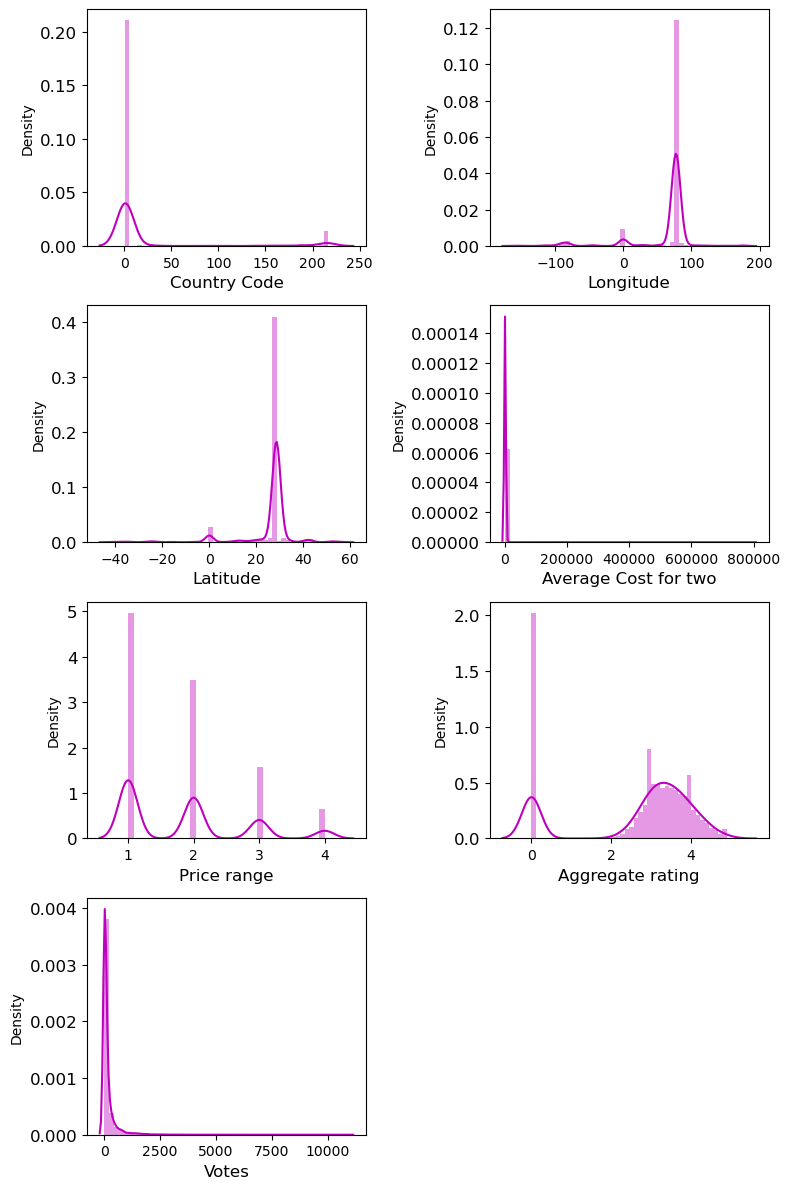

In [72]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(8,12))
p = 1
for i in num_col:
    if p <= 7:
        ax = plt.subplot(4, 2, p)
        sns.distplot(final_zomato_df1[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Almost all continuous data are not well normally distributed. 
            2. There are outliers
            3. we need to deal with skewness in the data 

In [414]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [415]:
final_zomato_df1.shape

(9551, 18)

## Feature Encoding

In [416]:
# Convert Object data type to int type

final_zomato_df1.dtypes

Country Code              int64
City                     object
Address                  object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [417]:
cat_col

['City',
 'Address',
 'Locality',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text',
 'Country']

In [418]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [419]:
for i in cat_col:
    final_zomato_df1[i] = label_enc.fit_transform(final_zomato_df1[i])

In [420]:
final_zomato_df1.dtypes

Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

Observation:
            1. Converted all Object data type to int type

In [236]:
final_zomato_df1.drop(['Locality', 'Address'], axis = 1, inplace = True)

In [421]:
final_zomato_df1.shape

(9551, 18)

## Check for Multicollinearity

## Data Correlation find - whether we need all 17 columns

In [422]:
final_zomato_df1.shape

(9551, 18)

In [423]:
# get coefficient of one variable with all the other variables

cor = final_zomato_df1.corr()
cor

,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,-0.181728,-0.220342,-0.120075,-0.698299,0.019792,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.181728,1.000000,-0.019763,0.096444,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Address,-0.220342,-0.019763,1.000000,0.159555,0.185801,-0.038654,0.023944,0.022749,0.069499,0.006428,0.029874,0.031267,-0.034952,-0.151153,0.071264,-0.008029,-0.101754,-0.235815
Locality,-0.120075,0.096444,0.159555,1.000000,0.086448,-0.020424,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.114459,-0.174336,0.036831,-0.036969,-0.123569,-0.118784
Longitude,-0.698299,0.117391,0.185801,0.086448,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,0.019792,-0.004301,-0.038654,-0.020424,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,-0.132902,0.026614,0.023944,0.006993,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719,-0.127955
Average Cost for two,0.043225,-0.028838,0.022749,-0.012136,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,-0.033466,-0.071996,0.069499,0.023723,0.337334,-0.101864,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296
Has Table booking,-0.061682,-0.003762,0.006428,-0.065594,0.100488,0.054658,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422,-0.062076


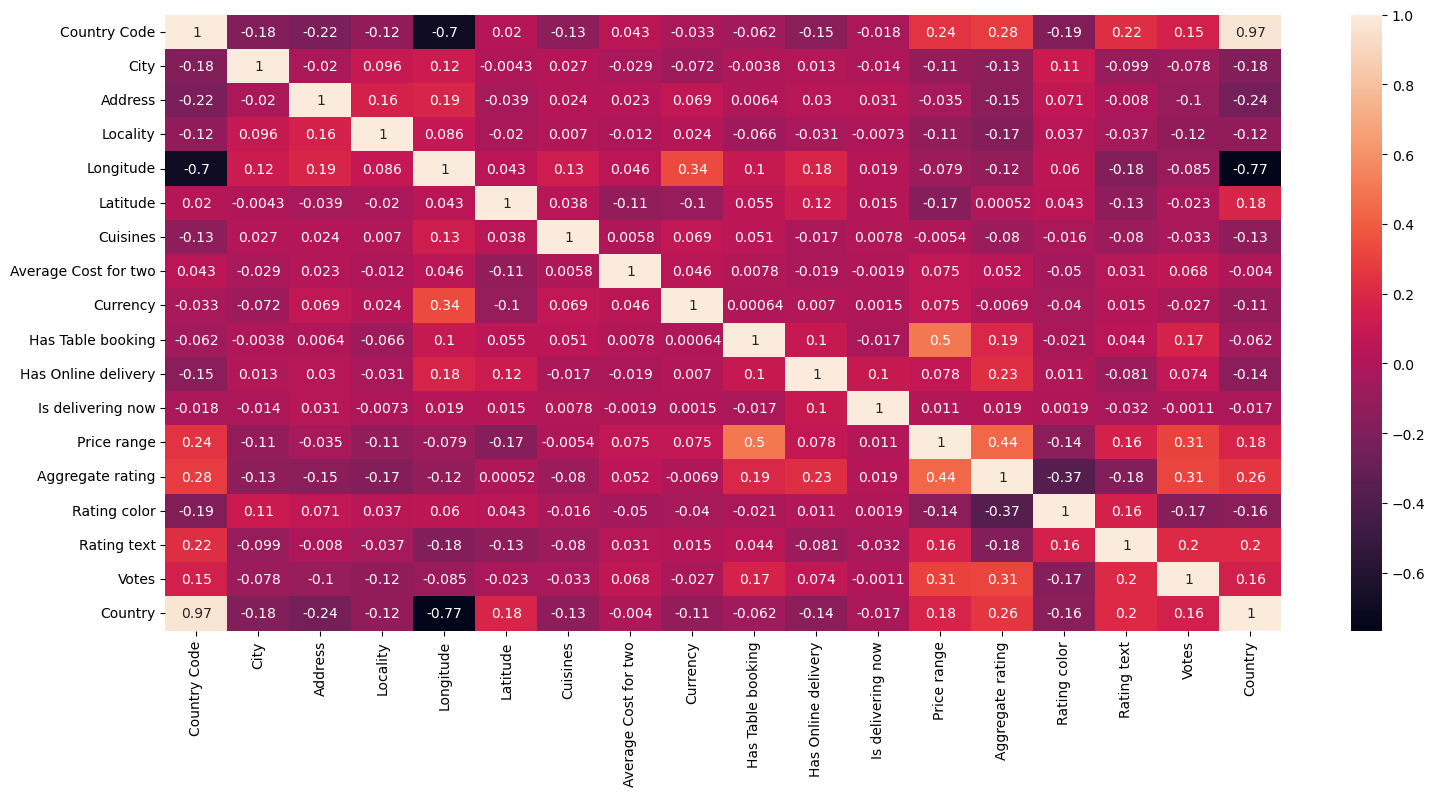

In [424]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'Country Code' v/s 'Country' has more positive correlation 
                0.97. This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

In [425]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

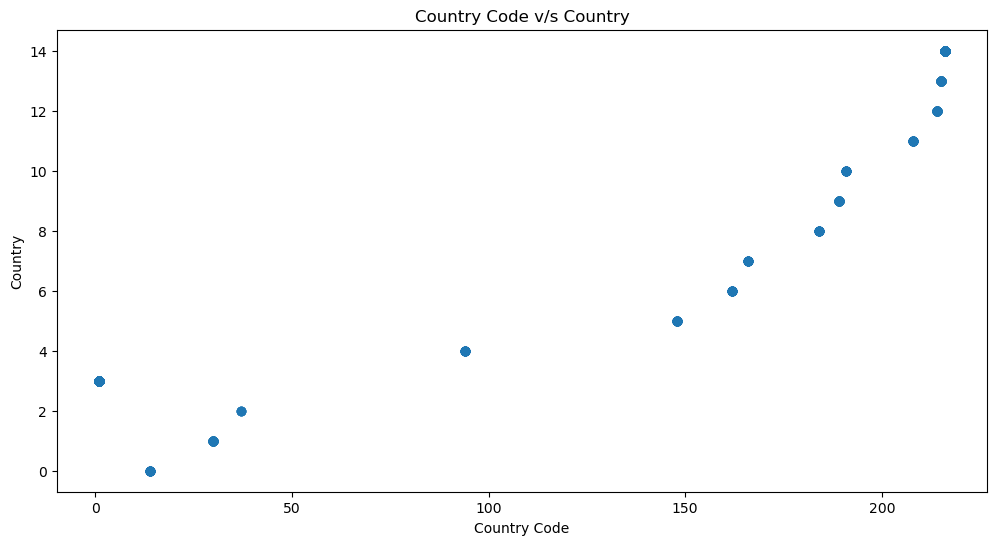

In [426]:
# one more proof so will plot scatter plot and check

plt.scatter(final_zomato_df1['Country Code'], final_zomato_df1.Country)
plt.xlabel("Country Code")
plt.ylabel("Country")
plt.title("Country Code v/s Country")
plt.show()

Observation:
            1. feature v/s feature - 'Country Code' v/s 'Country' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'Country Code' increases 'Country' value increases - positive correlation

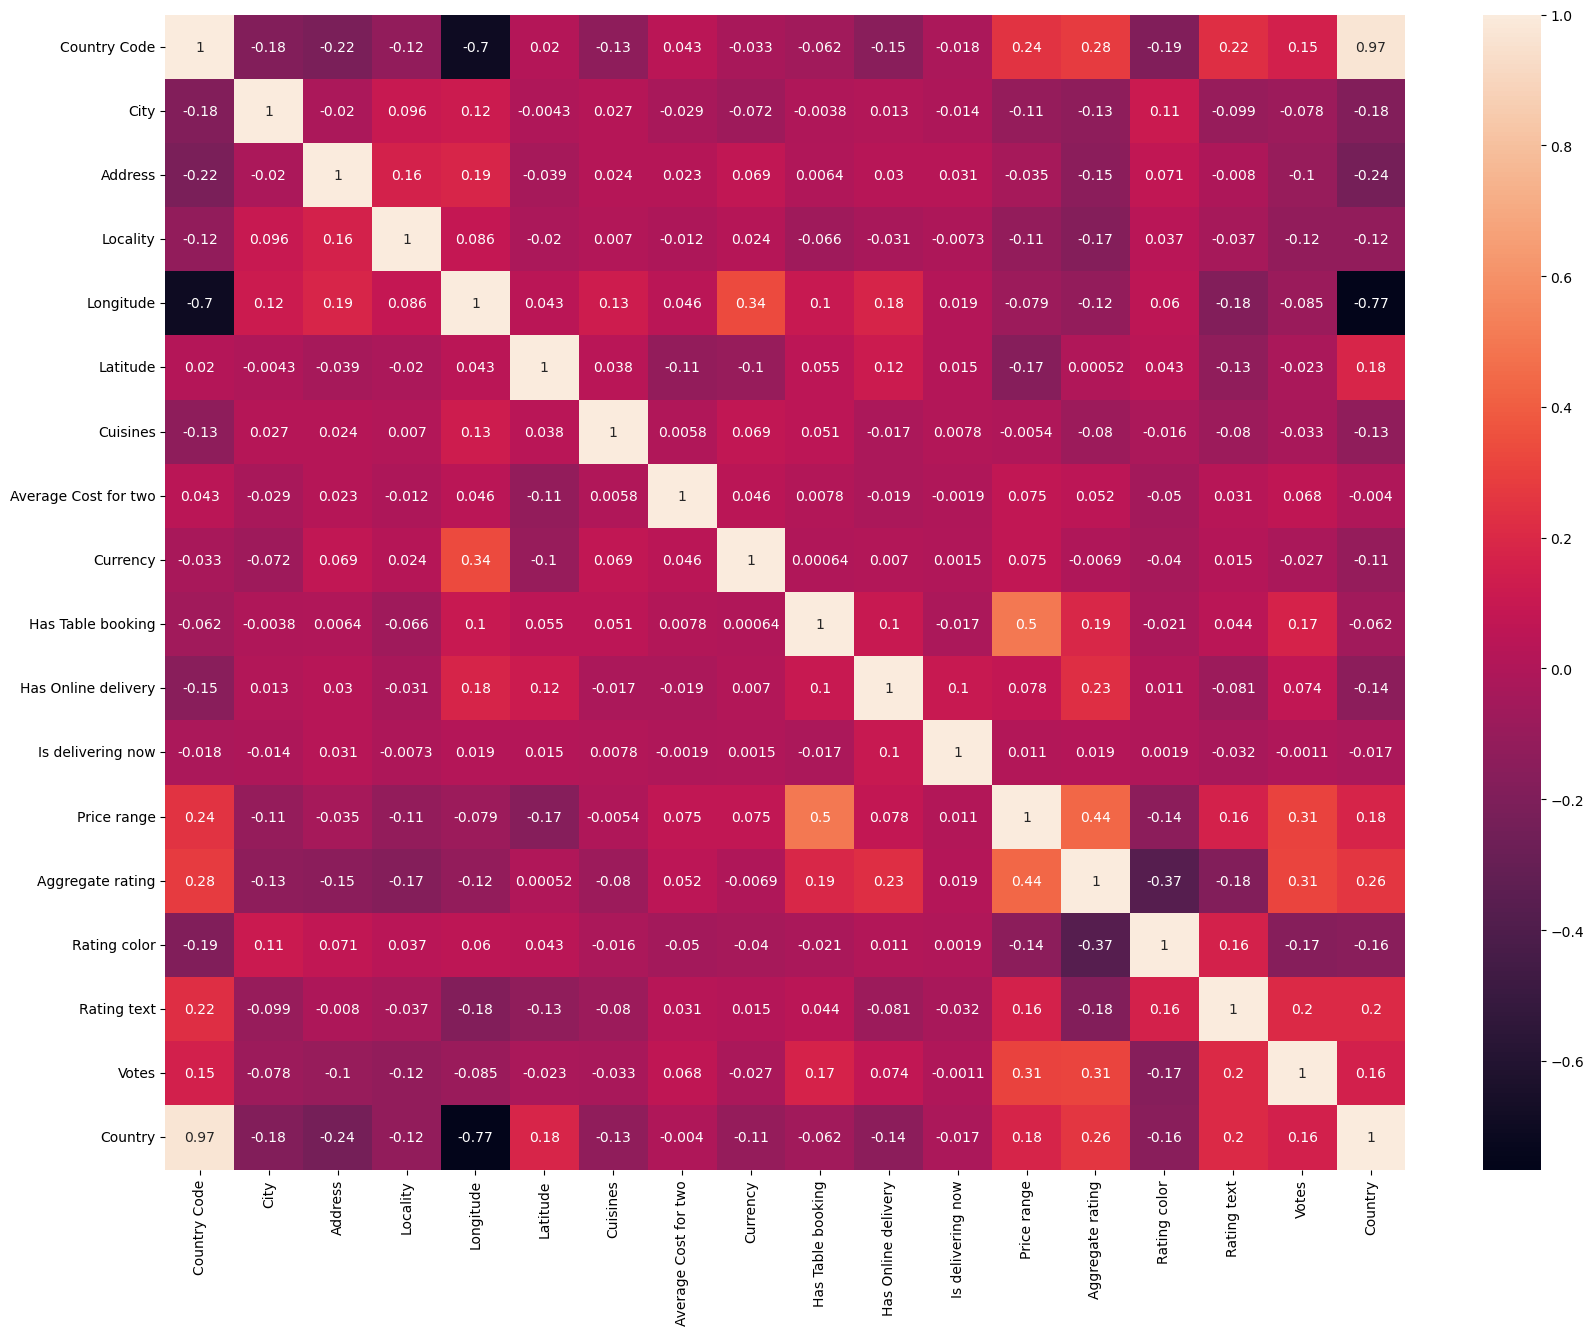

In [427]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'Country Code' v/s 'Average Cost for two' is 0.043 and 'Country' v/s 
               'Average Cost for two' is -0.004 from this heatmap 
                we get to know 'Country Code' is contributing more to 'Average Cost for two' than 
                'Country'. so we can remove 'Country' feature. 

In [428]:
final_zomato_df1.shape

(9551, 18)

In [429]:
final_zomato_df1.drop(['Country'], axis = 1, inplace = True)

In [430]:
final_zomato_df1.shape

(9551, 17)

## Seperating features and target

In [431]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [432]:
final_zomato_df1.shape

(9551, 17)

## Feature Selection

In [433]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model_avg = LinearRegression()
rfe_avg = RFE(model_avg, n_features_to_select = 5) 
fit_avg = rfe_avg.fit(x, y)

sel_features = x.columns[fit_avg.support_].tolist()
print(sel_features)


['Currency', 'Has Online delivery', 'Aggregate rating', 'Rating color', 'Rating text']


In [434]:
x = final_zomato_df1[['Currency', 'Has Online delivery', 'Aggregate rating', 'Rating color', 'Rating text']]

In [435]:
x

,Currency,Has Online delivery,Aggregate rating,Rating color,Rating text
0,0,0,4.8,0,1
1,0,0,4.5,0,1
2,0,0,4.4,1,5
3,0,0,4.9,0,1
4,0,0,4.8,0,1
...,...,...,...,...,...
9546,11,0,4.1,1,5
9547,11,0,4.2,1,5
9548,11,0,3.7,5,2
9549,11,0,4.0,1,5


In [515]:
y

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

## Checking Outliers

In [437]:
final_zomato_df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [438]:
# we dont check outliers for labels - so remove the label

final_zomato_df1_features = final_zomato_df1.drop(['City',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Average Cost for two', 'Price range', 'Rating color', 'Rating text', 'Votes'], axis = 1)

In [439]:
final_zomato_df1_features.shape

(9551, 6)

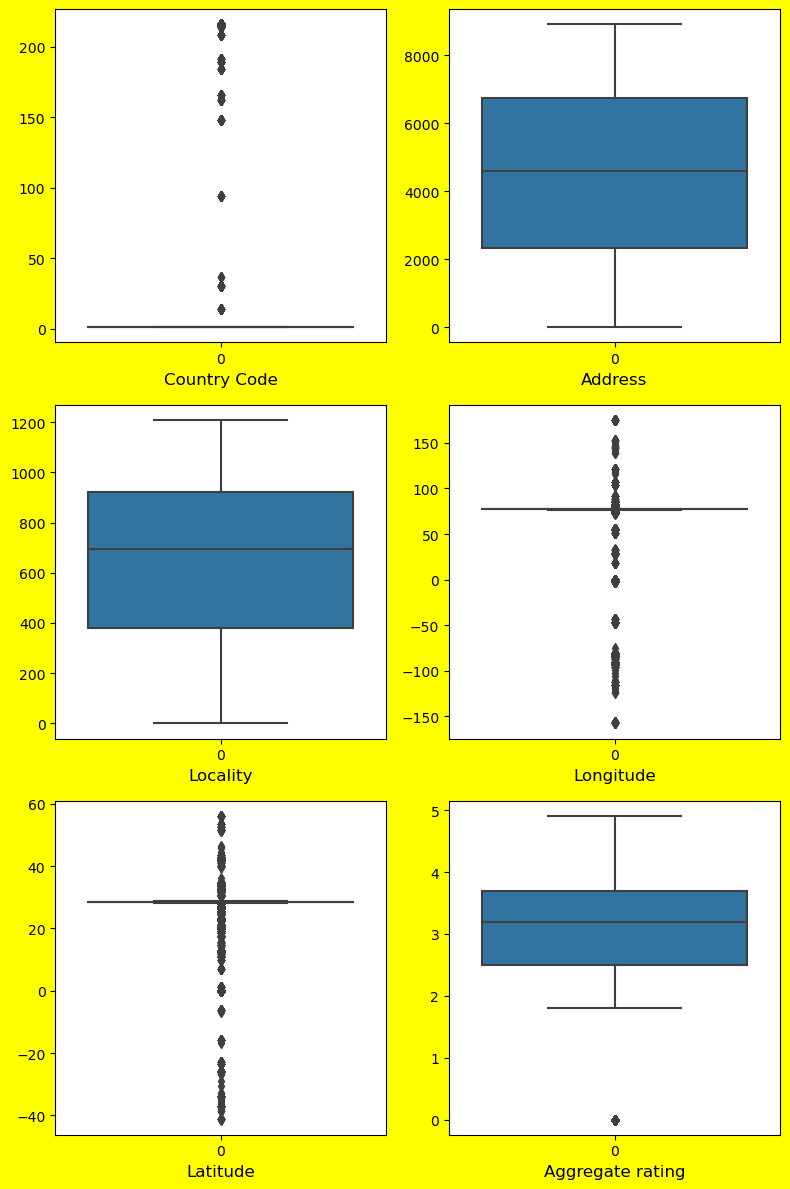

In [440]:
# Visualize the outliers using boxplot

plt.figure(figsize=(8,12), facecolor = 'yellow')
p = 1
for i in final_zomato_df1_features:
    if p <= 6:
        ax = plt.subplot(3, 2, p)
        sns.boxplot(data = final_zomato_df1_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

observations:
            1. More Outliers found in features 
            2. This outliers are right skewed and left skewed (i.e. outliers are above max value and 
               below min value)

In [441]:
final_zomato_df1_features.columns

Index(['Country Code', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Aggregate rating'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [442]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = final_zomato_df1.quantile(0.25)
q3 = final_zomato_df1.quantile(0.75)
iqr = q3 - q1

In [443]:
# validating one outlier

Longitude_high = (q3['Longitude'] + (1.5 * iqr['Longitude']))
Longitude_high

# anything > 77.583 outliers

77.58300117500002

In [444]:
# check the index which have the higher values

np_index = np.where(final_zomato_df1['Longitude'] > Longitude_high)
np_index

# remove these indexes as they are outliers

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         102,  143,  144,  269,  290,  292,  293,  314,  315,  316,  317,
         318,  321,  322,  343,  345,  348,  370,  371,  372,  393,  456,
         457,  458,  459,  460,  461,  462,  463,  464,  465,  466,  467,
         468,  469,  470,  471,  472,  473,  474,  475,  516,  517,  539,
         624,  626,  627,  628,  630,  631,  633,  634,  635,  636,  637,
         640,  641,  643,  665,  666,  667,  669,  671,  672,  676,  677,
         678,  679,  680,  681,  682,  683,  684,  726,  727,  728,  729,
         730,  731,  732,  733,  734,  735,  736,  737,  738,  739,  740,
         742,  743,  744,  745,  767,  769,  770,  772,  773,  774,  775,
         776,  777,  778,  779,  780,  782,  783,  784,  785,  786,  805,
         806,  807,  808,  809,  810,  811,  812,  813,  814,  815,  816,
         817,  818,  819,  820,  821, 

In [445]:
final_zomato_df1.shape

(9551, 17)

In [446]:
final_zomato_df1 = final_zomato_df1.drop(final_zomato_df1.index[np_index])

In [447]:
final_zomato_df1.shape  # 433 rows removed - outliers

(9118, 17)

In [448]:
final_zomato_df1

,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
22,30,21,7338,67,-47.881789,-15.764142,852,55,1,0,0,0,2,3.0,2,0,6
23,30,21,7336,67,-47.882667,-15.777500,331,30,1,0,0,0,1,3.8,5,2,9
24,30,21,7337,67,-47.882136,-15.757472,177,45,1,0,0,0,2,3.7,5,2,11
25,30,21,4245,67,-47.888167,-15.758833,257,60,1,0,0,0,3,3.8,5,2,11
26,30,21,7403,68,-47.915667,-15.831167,1618,50,1,0,0,0,2,3.2,2,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,140,5926,517,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788
9547,208,140,5962,552,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034
9548,208,140,5966,554,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661
9549,208,140,5967,554,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901


In [449]:
final_zomato_df1.reset_index(inplace = True, drop = True)

In [450]:
final_zomato_df1

,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,30,21,7338,67,-47.881789,-15.764142,852,55,1,0,0,0,2,3.0,2,0,6
1,30,21,7336,67,-47.882667,-15.777500,331,30,1,0,0,0,1,3.8,5,2,9
2,30,21,7337,67,-47.882136,-15.757472,177,45,1,0,0,0,2,3.7,5,2,11
3,30,21,4245,67,-47.888167,-15.758833,257,60,1,0,0,0,3,3.8,5,2,11
4,30,21,7403,68,-47.915667,-15.831167,1618,50,1,0,0,0,2,3.2,2,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,208,140,5926,517,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788
9114,208,140,5962,552,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034
9115,208,140,5966,554,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661
9116,208,140,5967,554,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901


## Checking for Skewness

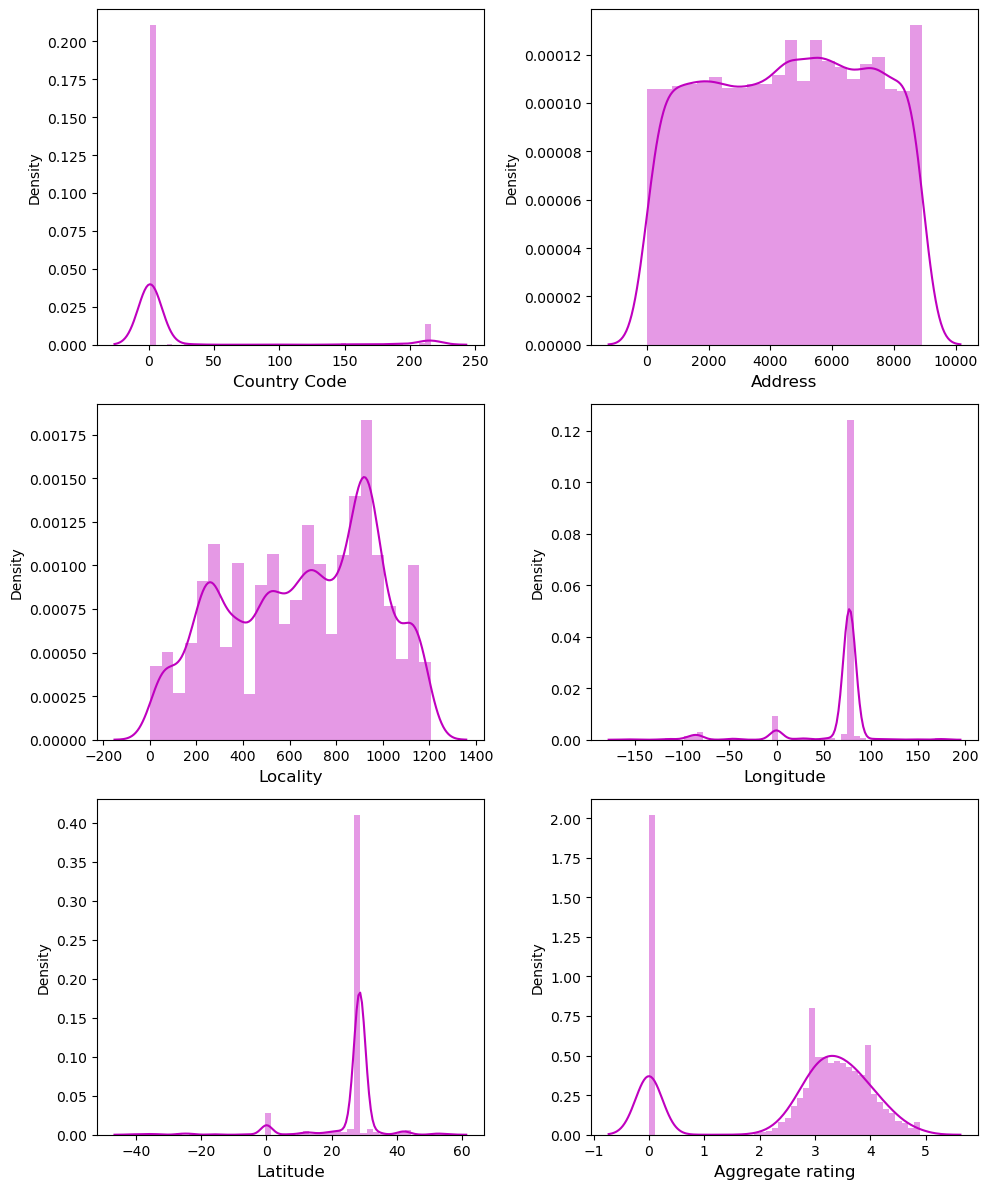

In [451]:
# how the data is distributed

plt.figure(figsize=(10,12))
p = 1
for i in final_zomato_df1_features:
    if p <= 6:
        ax = plt.subplot(3, 2, p)
        sns.distplot(final_zomato_df1_features[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [452]:
final_zomato_df1.skew() # not in the range -0.5 to +0.5

Country Code             3.215970
City                    -1.339989
Address                 -0.058396
Locality                -0.267940
Longitude               -2.989826
Latitude                -2.952541
Cuisines                -0.322181
Average Cost for two    63.234982
Currency                 3.246819
Has Table booking        2.323487
Has Online delivery      1.072337
Is delivering now       16.287034
Price range              0.965996
Aggregate rating        -0.912226
Rating color             0.047538
Rating text              0.431561
Votes                    6.864971
dtype: float64

In [453]:
# removing for skewness

final_zomato_df1['Country Code'] = np.cbrt(final_zomato_df1['Country Code'])

final_zomato_df1['Currency'] = np.cbrt(final_zomato_df1['Currency'])

final_zomato_df1['Has Table booking'] = np.cbrt(final_zomato_df1['Has Table booking'])

final_zomato_df1['Has Online delivery'] = np.cbrt(final_zomato_df1['Has Online delivery'])

final_zomato_df1['Is delivering now'] = np.cbrt(final_zomato_df1['Is delivering now'])

In [454]:
final_zomato_df1.skew() 

Country Code             3.139455
City                    -1.339989
Address                 -0.058396
Locality                -0.267940
Longitude               -2.989826
Latitude                -2.952541
Cuisines                -0.322181
Average Cost for two    63.234982
Currency                -0.322563
Has Table booking        2.323487
Has Online delivery      1.072337
Is delivering now       16.287034
Price range              0.965996
Aggregate rating        -0.912226
Rating color             0.047538
Rating text              0.431561
Votes                    6.864971
dtype: float64

Observation:
            1. Some features - categorical so we can neglect

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [455]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-4.3510457 , -0.58754682,  1.4071309 , -1.97785894, -0.4654417 ],
       [-4.3510457 , -0.58754682,  1.20928063, -1.97785894, -0.4654417 ],
       [-4.3510457 , -0.58754682,  1.14333054, -1.30805322,  1.89507002],
       ...,
       [ 7.68141494, -0.58754682,  0.68167991,  1.37116966,  0.12468623],
       [ 7.68141494, -0.58754682,  0.87953018, -1.30805322,  1.89507002],
       [ 7.68141494, -0.58754682,  0.87953018, -1.30805322,  1.89507002]])

In [456]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.002749,Currency
1,1.068450,Has Online delivery
2,1.248649,Aggregate rating
3,1.185736,Rating color
4,1.049550,Rating text


In [ ]:
Observation: 
            1. The threshold VIF value is 10 and any feature > 10 VIF value has high correlation with 
               other features. Here we can observe all features are within the threshold value. 
               so there is no multicollinearity problem. 

In [457]:
final_zomato_df1.shape

(9118, 17)

## Modelling

In [463]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [465]:
x.shape

(9551, 5)

In [466]:
y.shape

(9551,)

In [273]:
# Feature Scaling using Standard Scalarization

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-4.3510457 , -0.58754682,  1.4071309 , -1.97785894, -0.4654417 ],
       [-4.3510457 , -0.58754682,  1.20928063, -1.97785894, -0.4654417 ],
       [-4.3510457 , -0.58754682,  1.14333054, -1.30805322,  1.89507002],
       ...,
       [ 7.68141494, -0.58754682,  0.68167991,  1.37116966,  0.12468623],
       [ 7.68141494, -0.58754682,  0.87953018, -1.30805322,  1.89507002],
       [ 7.68141494, -0.58754682,  0.87953018, -1.30805322,  1.89507002]])

## HoldOut Validation Approach

In [274]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [275]:
x_train.shape

(6685, 5)

In [277]:
y_train.shape

(6685,)

In [278]:
y_test.shape

(2866,)

In [279]:
x_test.shape

(2866, 5)

## Linear Regression

## We select KFold cross validation

In [467]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [468]:
kfold = KFold(n_splits = 5, shuffle = True)

In [469]:
model_LR = LinearRegression()

In [470]:
LR_scores1 = cross_val_score(model_LR, x_train, y_train, cv = kfold, scoring = 'r2')
LR_scores1

array([ 0.00225094,  0.01053841,  0.01548616,  0.00841887, -0.33791377])

In [471]:
print(np.mean(LR_scores1)) 

-0.06024387839989569


In [472]:
model_LR.fit(x_train , y_train)

LinearRegression()

In [473]:
model_LR.score(x_test, y_test)

0.0037113596393523185

In [474]:
y_pred = model_LR.predict(x_test)
y_pred

array([2407.27205584, 3896.22150372, 1152.04735943, ...,  385.95341768,
        202.11763229,   46.66892991])

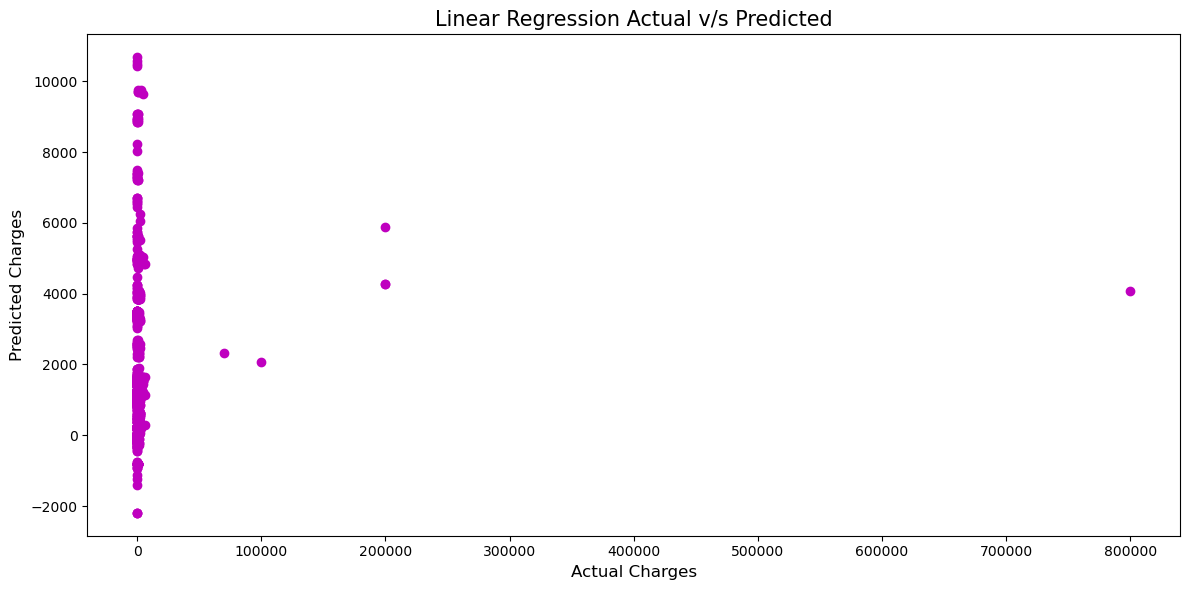

In [475]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title('Linear Regression Actual v/s Predicted', fontsize=15)
plt.tight_layout()

Observation:
            1. Good number of samples are not following linear curve

In [476]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [477]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  0.37113596393523185
MAE  1554.5292733877077
MSE  268819633.4273428
RMSE  16395.71997282653


Observation:
            1. Linear Regression model with kfold cross validation - 37.11%

## Random Forest Regression

In [478]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state = 348)

In [479]:
from sklearn.ensemble import RandomForestRegressor

In [480]:
RFR = RandomForestRegressor()

In [481]:
kfold = KFold(n_splits = 5, shuffle = True)

In [482]:
RF_scores1 = cross_val_score(RFR, x_train1, y_train1, cv = kfold, scoring = 'r2')
RF_scores1

array([ 0.98304049, -0.82090932,  0.55465017,  0.4060838 ,  0.03117559])

In [483]:
print(np.mean(RF_scores1)) 

0.23080814751140483


In [484]:
RFR.fit(x_train1, y_train1)

RandomForestRegressor()

In [485]:
RFR.score(x_test, y_test)

0.5165972614556203

In [486]:
pred_RFR = RFR.predict(x_test1)
pred_RFR

array([611.35271392, 334.79330088, 334.79330088, ..., 606.09194652,
       692.03550401, 606.09194652])

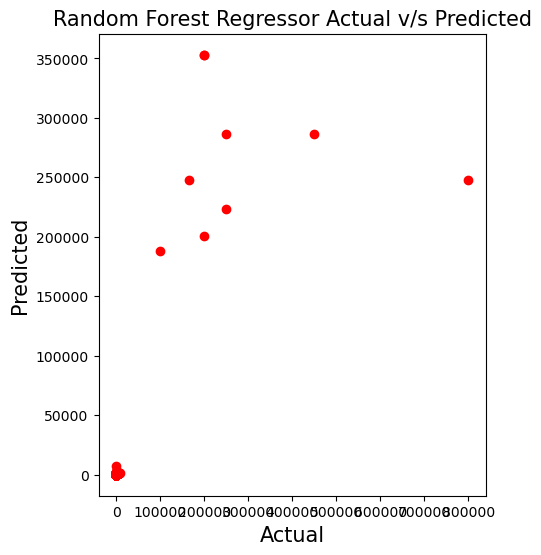

In [487]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test1, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. We are able to see good number of samples are not following linear curve

In [488]:
print("r2_score on test data ", r2_score(y_test1, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test1, pred_RFR))

print("MSE ", mean_squared_error(y_test1, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test1, pred_RFR)))

r2_score on test data  64.64684158653581
MAE  810.4626936444528
MSE  165757878.76743928
RMSE  12874.699171920067


Observation:
            1. Random Forest Regression model with kfold cross validation - 64.64%

## KNN Regressor

In [489]:
from sklearn.neighbors import KNeighborsRegressor

In [490]:
kfold = KFold(n_splits = 5, shuffle = True)

In [491]:
knn = KNeighborsRegressor()

In [492]:
knn_scores1 = cross_val_score(knn, x_train, y_train, cv = kfold, scoring = 'r2')
knn_scores1

array([ 0.74669227,  0.06349464,  0.50859911, -6.34082213,  0.09238313])

In [493]:
print(np.mean(knn_scores1)) 

-0.9859305967129061


In [494]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [495]:
knn.score(x_test, y_test)

0.5316523805076672

In [496]:
pred_knn = knn.predict(x_test)
pred_knn

array([ 770., 1240.,  500., ...,  510.,  330.,   25.])

In [497]:
## Lets check how well model fits on test data

knn.score(x_test, y_test)

0.5316523805076672

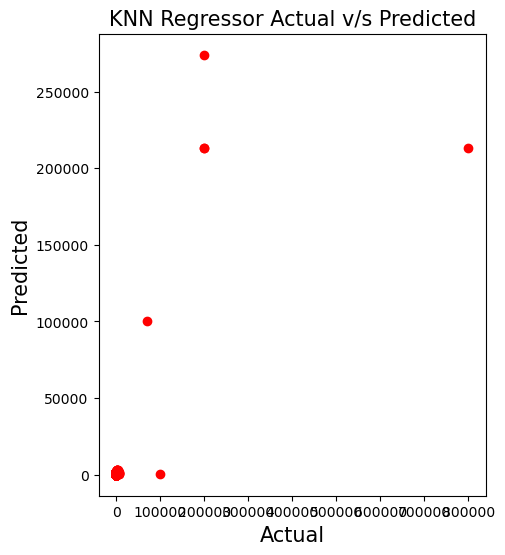

In [498]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_knn, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('KNN Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are not following linear curve

In [499]:
print("r2_score on test data ", r2_score(y_test, pred_knn) * 100)

print("MAE ", mean_absolute_error(y_test, pred_knn))

print("MSE ", mean_squared_error(y_test, pred_knn))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_knn)))

r2_score on test data  53.16523805076672
MAE  623.9284717376134
MSE  126370040.05478019
RMSE  11241.442970312139


In [ ]:
Observation:
            1. KNN Regression model with kfold cross validation - 53.16%

## Ridge Regression

In [500]:
from sklearn.linear_model import Ridge

In [501]:
kfold = KFold(n_splits = 5, shuffle = True)

In [502]:
ridge = Ridge()

In [503]:
ridge_scores1 = cross_val_score(ridge, x_train, y_train, cv = kfold, scoring = 'r2')
ridge_scores1

array([ 5.61840428e-03,  8.31416288e-03,  1.73141970e-02, -1.30176255e+01,
        1.64915194e-02])

In [504]:
print(np.mean(ridge_scores1))

-2.5939774455922877


In [505]:
ridge.fit(x_train, y_train)

Ridge()

In [506]:
ridge.score(x_test, y_test)

0.0037118169709345894

In [507]:
pred_ridge = ridge.predict(x_test)
pred_ridge

array([2407.04980341, 3896.67407964, 1151.82605436, ...,  386.45655259,
        202.12720784,   46.54807545])

In [508]:
## Lets check how well model fits on test data

ridge.score(x_test, y_test)

0.0037118169709345894

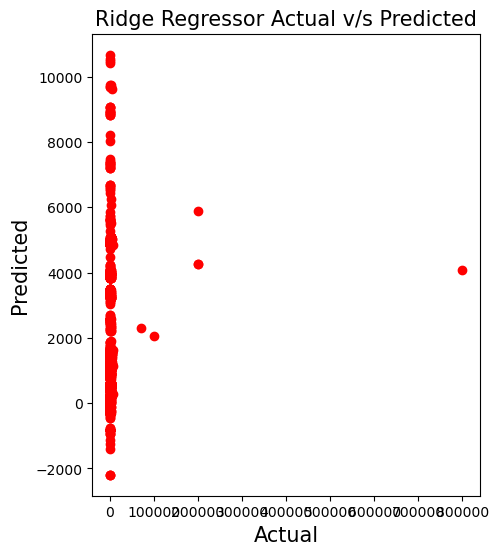

In [509]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_ridge, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Ridge Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

In [510]:
print("r2_score on test data ", r2_score(y_test, pred_ridge) * 100)

print("MAE ", mean_absolute_error(y_test, pred_ridge))

print("MSE ", mean_squared_error(y_test, pred_ridge))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_ridge)))

r2_score on test data  0.37118169709345894
MAE  1554.32339793506
MSE  268819510.0296613
RMSE  16395.716209719576


Observation: 
            1. Ridge Regressor model with KFold Cross Validation method - accuracy - 37.11%

## HyperParameter Tuning for Random Forest Regressor model as its accuracy is better 88.81%

In [511]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [512]:
kf = KFold(n_splits = 5, shuffle = True)

In [513]:
grid_search = GridSearchCV(RFR, param_grid, scoring = 'r2', cv = kf)

In [514]:
grid_search.fit(x_train1, y_train1)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [516]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [517]:
RFR_hyper_model = grid_search.best_estimator_

## Retrain the model

In [518]:
RFR_hyper_model.fit(x_train1, y_train1)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [519]:
RFR_testing_acc = RFR_hyper_model.score(x_test1, y_test1)
RFR_testing_acc

0.663042058051954

Observation:
            5. Random Forest Regression model with hyper parameter tuning - 66.30%
            6. We can choose Random Forest Regressor model with hyper parameter tuning for prediction, 
               it has higher acc

## Saving the model

In [520]:
import pickle
filename = "Zomato_Restaurant_Average_Cost_Model.pkl"
pickle.dump(RFR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [521]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Zomato_Restaurant_Average_Cost_Model.pkl', 'rb'))

In [522]:
loaded_model1.score(x_test1, y_test1)

0.663042058051954

In [523]:
prediction = loaded_model1.predict(x_test1)
prediction

array([609.2950343 , 334.2391271 , 334.2391271 , ..., 616.68279665,
       706.128832  , 616.68279665])

Observation:
            1. Almost all actual and predicted values match
            2. This Zomato_Restaurant_Average_Cost_Model.pkl can be used to predict average cost for 
               two 

Observation:
            5. Random Forest Regression model with hyper parameter tuning - 66.30%
            6. We can choose Random Forest Regressor model with hyper parameter tuning for prediction